In [132]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  


In [133]:
# Load the dataset
df = pd.read_csv('csv/prelim_datasets/gameandgrade.csv')

# Filter out invalid grades
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")
df = df[(df["Grade"] >= 75.00) & (df["Grade"] <= 100)]
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
4,1,1,1,1,2,1,1,3,4,85.0
5,0,1,1,5,1,1,1,2,2,80.0


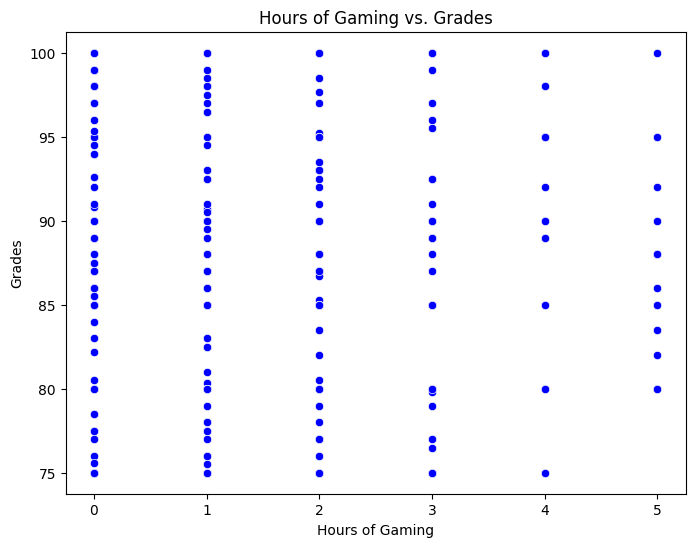

In [134]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Playing Hours"], y=df["Grade"], color="blue")
plt.xlabel("Hours of Gaming")
plt.ylabel("Grades")
plt.title("Hours of Gaming vs. Grades")
plt.show()

In [135]:
X = df[["Playing Hours"]]
y = df["Grade"]


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
print("Training Set:")
print(X_train)
print(y_train)

print("\nTesting Set:")
print(X_test)
print(y_test)


Training Set:
     Playing Hours
687              1
231              1
200              2
122              1
768              3
..             ...
214              0
468              0
591              3
706              0
203              0

[371 rows x 1 columns]
687     80.0
231     85.0
200     75.0
122     75.0
768     77.0
       ...  
214     80.0
468    100.0
591     79.0
706     82.2
203     80.0
Name: Grade, Length: 371, dtype: float64

Testing Set:
     Playing Hours
14               5
54               1
76               5
734              1
464              2
..             ...
606              0
35               0
506              3
90               0
247              3

[93 rows x 1 columns]
14      95.0
54      98.0
76      92.0
734     92.5
464     90.0
       ...  
606    100.0
35      90.0
506     85.0
90     100.0
247    100.0
Name: Grade, Length: 93, dtype: float64


In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
Y_pred = model.predict(X_test)

In [140]:
print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Coefficient (m): {model.coef_[0]:.2f}")

Intercept (b): 88.89
Coefficient (m): -0.10


In [141]:
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 70.69
R² Score: 0.01


In [142]:
grade_variance = np.var(y_test)
print(f"Grade Variance: {grade_variance:.2f}")


Grade Variance: 71.14


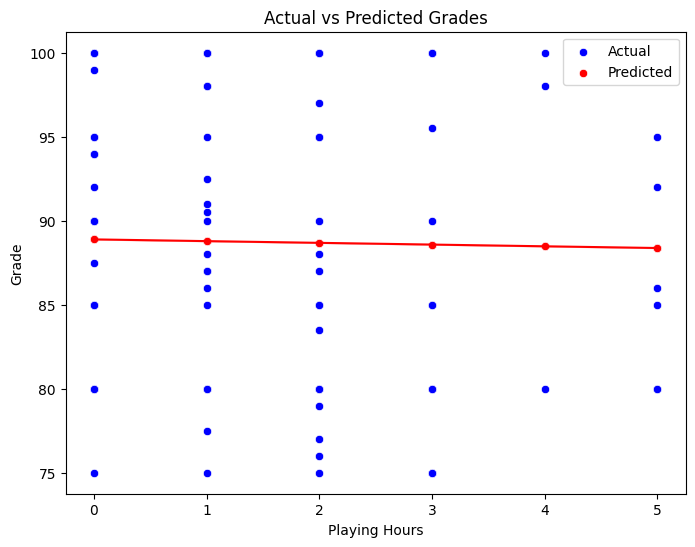

In [143]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual")
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")
sns.lineplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red")
plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Actual vs Predicted Grades")
plt.legend()
plt.show()